<a href="https://colab.research.google.com/github/Monisha2604/Final_Year_Project/blob/master/LR_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark

     |████████████████████████████████| 212.4MB 60kB/s 
     |████████████████████████████████| 204kB 17.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=096083a50b98182fba0b7d0be21daa259a484996fb6107f7aed6e49a6f70ba1f
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [ ]:

from pyspark.sql import SparkSession
spark= SparkSession.builder.appName('Customers').getOrCreate()

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
dataset=spark.read.csv("/content/drive/MyDrive/Copy of Final_project_processed_data.csv",inferSchema=True,header=True)

In [ ]:

dataset

DataFrame[_c0: int, psfMag_u: double, psfMag_g: double, psfMag_r: double, psfMag_i: double, psfMag_z: double, dered_u: double, dered_g: double, dered_r: double, dered_i: double, dered_z: double, fiberMag_u: double, fiberMag_g: double, fiberMag_r: double, fiberMag_i: double, fiberMag_z: double, petroR50_r: double, petroR50_z: double, petroR90_r: double, petroR90_z: double, r: double, i: double, z: double, redshift: double]

In [ ]:

dataset.show()

+---+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+
|_c0|          psfMag_u|          psfMag_g|          psfMag_r|          psfMag_i|          psfMag_z|           dered_u|           dered_g|           dered_r|           dered_i|           dered_z|        fiberMag_u|        fiberMag_g|        fiberMag_r|        fiberMag_i|        fiberMag_z|        petroR50_r|        petroR50_z|        petroR90_r|        petroR90_z|                 r|                 i|                 z|           redshift|
+---+------------------+------------------+------------------+------------------+------------------+------------

In [ ]:
len(dataset.columns)

24

In [ ]:
dataset.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- psfMag_u: double (nullable = true)
 |-- psfMag_g: double (nullable = true)
 |-- psfMag_r: double (nullable = true)
 |-- psfMag_i: double (nullable = true)
 |-- psfMag_z: double (nullable = true)
 |-- dered_u: double (nullable = true)
 |-- dered_g: double (nullable = true)
 |-- dered_r: double (nullable = true)
 |-- dered_i: double (nullable = true)
 |-- dered_z: double (nullable = true)
 |-- fiberMag_u: double (nullable = true)
 |-- fiberMag_g: double (nullable = true)
 |-- fiberMag_r: double (nullable = true)
 |-- fiberMag_i: double (nullable = true)
 |-- fiberMag_z: double (nullable = true)
 |-- petroR50_r: double (nullable = true)
 |-- petroR50_z: double (nullable = true)
 |-- petroR90_r: double (nullable = true)
 |-- petroR90_z: double (nullable = true)
 |-- r: double (nullable = true)
 |-- i: double (nullable = true)
 |-- z: double (nullable = true)
 |-- redshift: double (nullable = true)



In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
LinReg = LinearRegression(featuresCol="features", labelCol="redshift")

In [ ]:
feature_cols = dataset.columns[:-1] 
from pyspark.ml.feature import VectorAssembler
vect_assembler = VectorAssembler(inputCols=feature_cols,outputCol="features")

In [ ]:
dataset_w_features = vect_assembler.transform(dataset)

In [ ]:
dataset_w_features.show()

+---+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+
|_c0|          psfMag_u|          psfMag_g|          psfMag_r|          psfMag_i|          psfMag_z|           dered_u|           dered_g|           dered_r|           dered_i|           dered_z|        fiberMag_u|        fiberMag_g|        fiberMag_r|        fiberMag_i|        fiberMag_z|        petroR50_r|        petroR50_z|        petroR90_r|        petroR90_z|                 r|                 i|                 z|           redshift|            features|
+---+------------------+------------------+------------------+--------

In [ ]:
finalized_data = dataset_w_features.select("features","redshift")

finalized_data.show()

+--------------------+-------------------+
|            features|           redshift|
+--------------------+-------------------+
|[0.0,24.35021,22....| 0.8162744000000001|
|[1.0,24.47392,22....|          0.5564747|
|[2.0,23.38084,22....|           0.619608|
|[3.0,24.722579999...|          0.4611808|
|[4.0,25.2249,24.4...|          0.6421724|
|[5.0,23.553539999...|          0.5553204|
|[6.0,21.70427,20....|         0.04402394|
|[7.0,21.58328,20....|         0.08781031|
|[8.0,21.1678,19.4...|         0.05917491|
|[9.0,21.17853,19....|0.10928620000000001|
|[10.0,21.78882999...|         0.08782733|
|[11.0,20.89442,19...|         0.07788806|
|[12.0,21.04597,20...|         0.01660742|
|[13.0,20.38704,19...|          0.0504769|
|[14.0,21.61665,19...|          0.1077413|
|[15.0,23.30925,22...|          0.4031112|
|[16.0,21.49633,19...|         0.09800664|
|[17.0,22.23800000...|          0.1531249|
|[18.0,22.00384,20...|         0.06366909|
|[19.0,21.40737,20...|         0.02425634|
+----------

In [ ]:
train_dataset, test_dataset = finalized_data.randomSplit([0.8, 0.2])

In [ ]:
train_dataset.describe().show()

+-------+------------------+
|summary|          redshift|
+-------+------------------+
|  count|           1952880|
|   mean| 0.683088100314199|
| stddev|0.7282882441080007|
|    min|       -0.01144691|
|    max|7.0519300000000005|
+-------+------------------+



In [ ]:
test_dataset.describe().show()

+-------+------------------+
|summary|          redshift|
+-------+------------------+
|  count|            489020|
|   mean| 0.683622690672876|
| stddev|0.7291519979327177|
|    min|        -0.0113323|
|    max|           7.03844|
+-------+------------------+



In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
LinReg = LinearRegression(featuresCol="features", labelCol="redshift")

In [ ]:
import time

start=time.process_time()

model = LinReg.fit(train_dataset)

stop=time.process_time()
execution_time = (stop - start)/60
print("Program Executed in minutes "+str(execution_time))

Program Executed in minutes 0.007713025949999993


In [ ]:
import timeit

start=timeit.default_timer()

model = LinReg.fit(train_dataset)

stop=timeit.default_timer()
execution_time = (stop - start)/60
print("Program Executed in minutes "+str(execution_time))

Program Executed in minutes 1.1981473896833337


In [ ]:
pred = model.evaluate(test_dataset)

In [ ]:
result=pred.predictions.collect()

In [ ]:
#len(pred.predictions)

In [ ]:
dataframe=spark.createDataFrame(result)

In [ ]:
#coefficient = model.coefficients
#print ("The coefficient of the model is : %a" %coefficient)

In [ ]:
#intercept = model.intercept
#print ("The Intercept of the model is : %f" %intercept)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluation = RegressionEvaluator(labelCol="redshift", predictionCol="prediction")

In [ ]:
rmse = evaluation.evaluate(pred.predictions, {evaluation.metricName: "rmse"})
print("RMSE: %.3f" % rmse)


RMSE: 0.497


In [ ]:
mse = evaluation.evaluate(pred.predictions, {evaluation.metricName: "mse"})
print("MSE: %.3f" % mse)

In [ ]:
mae = evaluation.evaluate(pred.predictions, {evaluation.metricName: "mae"})
print("MAE: %.3f" % mae)

MAE: 0.295


In [ ]:
r2 = evaluation.evaluate(pred.predictions, {evaluation.metricName: "r2"})
print("r2: %.3f" %r2)

r2: 0.540


In [ ]:
r2_test= model.evaluate(test_dataset).r2
print("R2 score on test set: ", r2_test)

R2 score on test set:  0.5400967926245417


In [ ]:
import numpy as np


Y_test=np.array(dataframe.select("redshift").collect())
Y_pred=np.array(dataframe.select("prediction").collect())

In [ ]:
import matplotlib.pyplot as plt

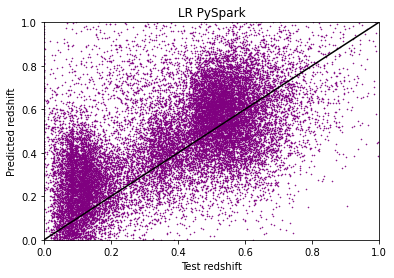

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("LR PySpark")
plt.scatter(Y_test[:30000], Y_pred[:30000], s=0.30, color="purple")
ax1.set_xlabel("Test redshift")
ax1.set_ylabel("Predicted redshift")
ax1.plot([0,1], [0,1], '-r',color="black")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

    
plt.show()